In [196]:
# import modules
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE, locally_linear_embedding
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances
import os
import random
import collections

# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

# constants and parameters
DATA_PATH = './'
IMG_PATH = './images'

# load data 
with open(f'{DATA_PATH}data_file_20181203.json') as f:
    data = json.load(f)

In [197]:
# create data frame
df = {'Name': np.zeros(len(data['quantlets'])), 
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])), 
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

In [198]:
# extract the columns we need
for c, i in enumerate(data['quantlets']):
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        print('did not work')
 #   if c % 100 == 0:
 #       print(c)

df = df[df['is_debuggable']==True]

did not work
did not work
did not work
did not work
did not work
did not work
did not work


In [199]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

In [200]:
# prepare for plotting
lle = locally_linear_embedding(train_X, n_components=2, n_neighbors=12, random_state=0)

In [201]:
lle = lle[0]

In [202]:
ray = ((lle[:,0]>-0.02) &  (lle[:,0]<0.03))
def colors_assignment(row):
    if row==True:
        return 'red'
    else:
        return 'blue'
colors = pd.Series(ray).apply(colors_assignment)

In [203]:
words = ' '.join(df.keywords[ray].values).split()
ctr = collections.Counter(words)
ctr = dict(ctr)
words_df = pd.DataFrame({'word':list(ctr.keys()), 'freq':list(ctr.values())})
words_df.sort_values('freq', ascending=False).head(10)

,word,freq
0,plot,919
3,graphical,647
4,representation,645
11,visualization,595
10,data,437
41,financial,369
20,distribution,264
368,time-series,253
36,regression,244
40,simulation,235


In [204]:
words2 = ' '.join(df.keywords[~ray].values).split()
ctr2 = collections.Counter(words2)
ctr2 = dict(ctr2)
words_df2 = pd.DataFrame({'word':list(ctr2.keys()), 'freq':list(ctr2.values())})
words_df2.sort_values('freq', ascending=False).head(10)

,word,freq
5,plot,78
9,representation,69
8,graphical,69
3,data,51
4,visualization,45
153,financial,37
18,estimation,33
118,option,31
239,asset,23
16,regression,22


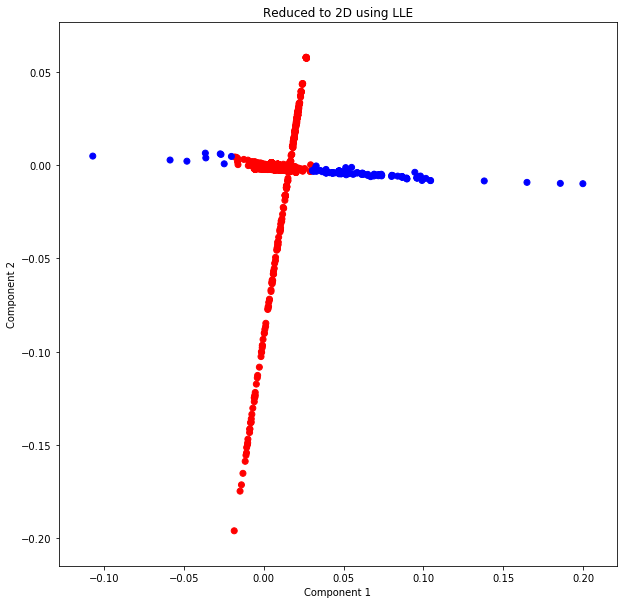

In [205]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(lle[:,0], lle[:,1], marker='o', c=colors)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

plt.savefig('./LLE_reduce_quantlets.png', transparent=True)

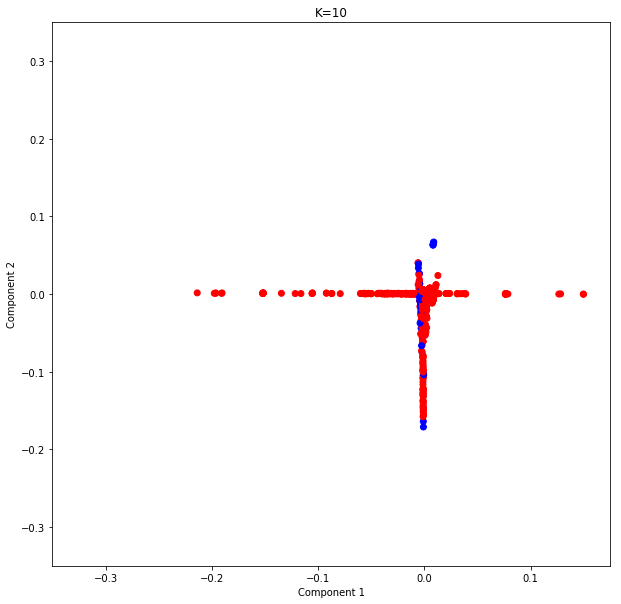

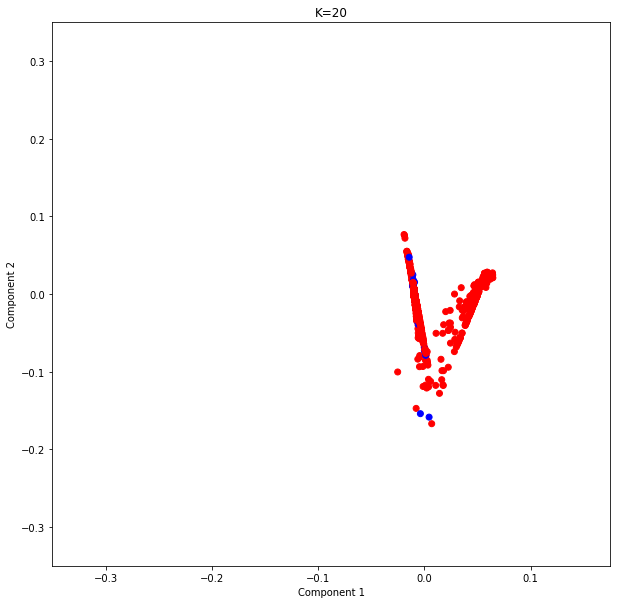

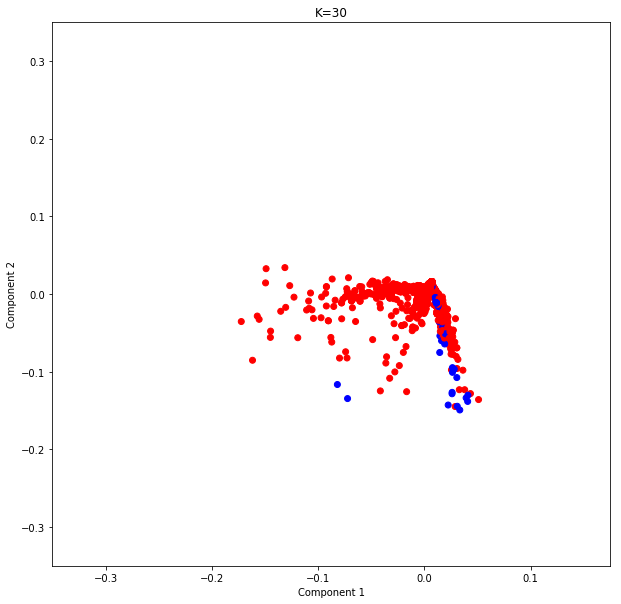

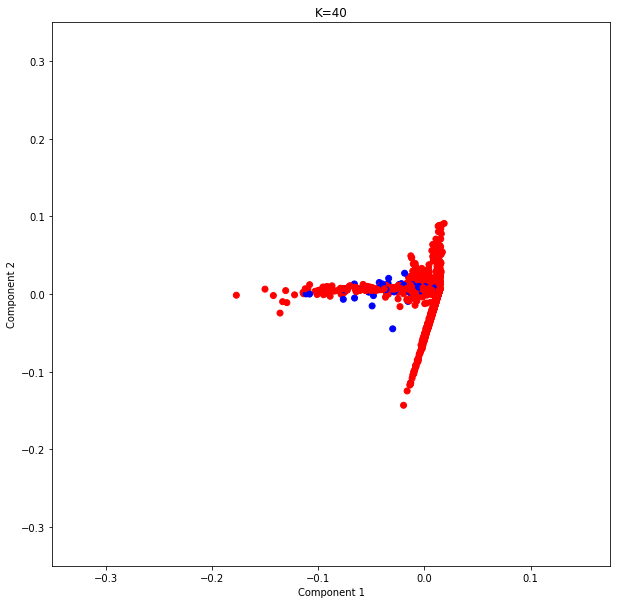

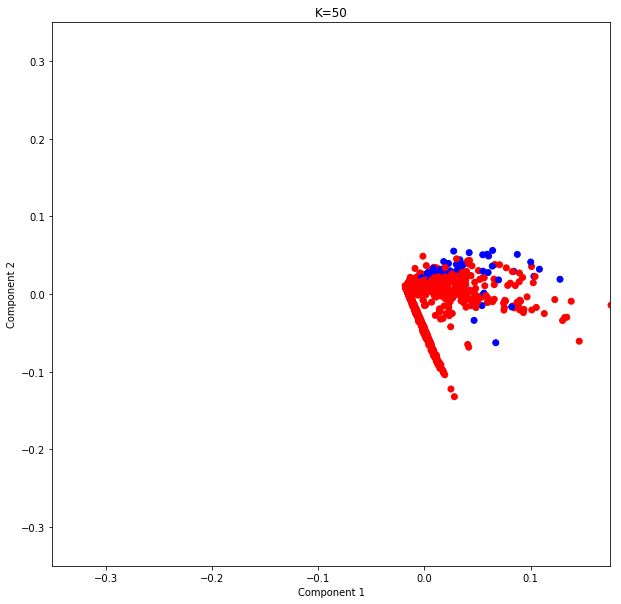

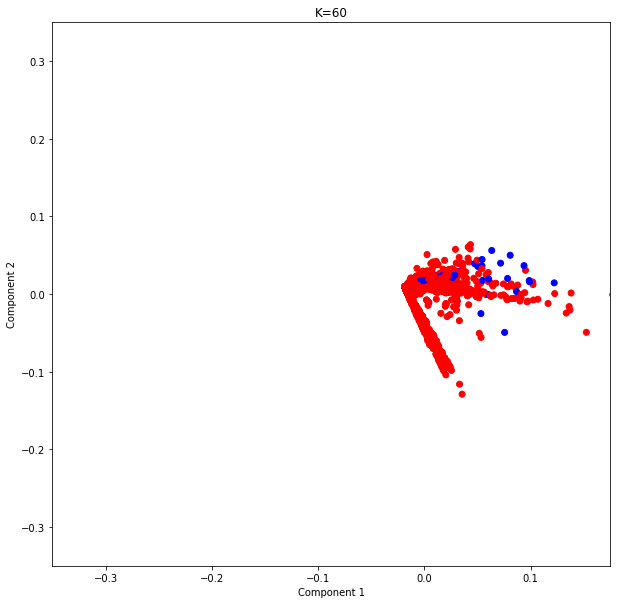

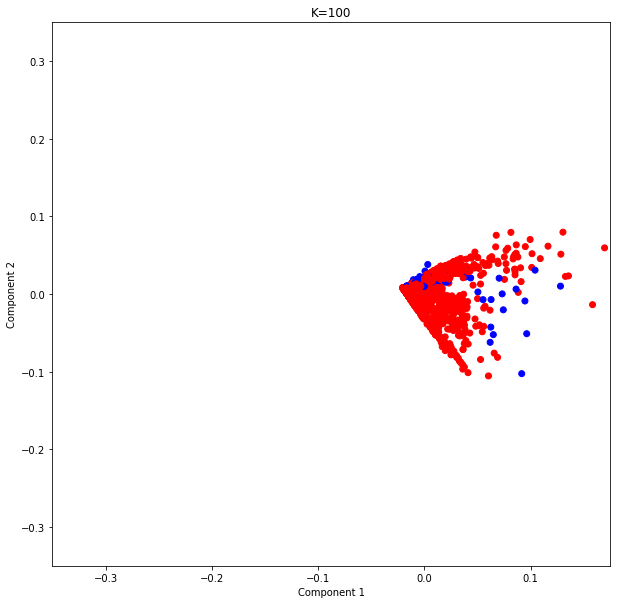

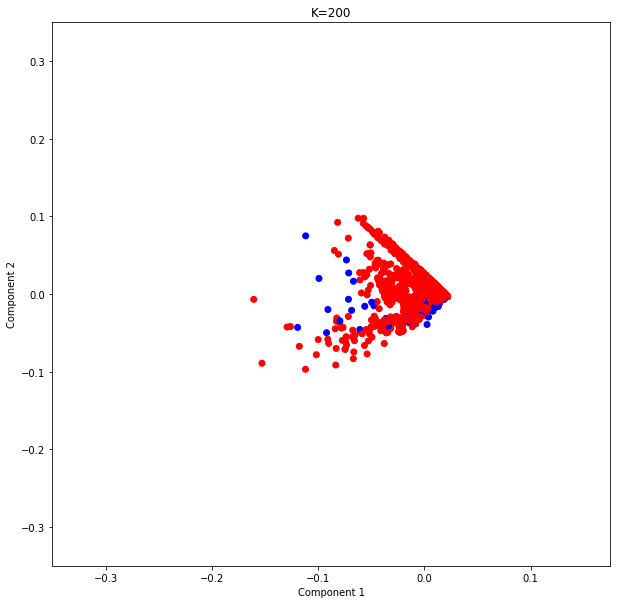

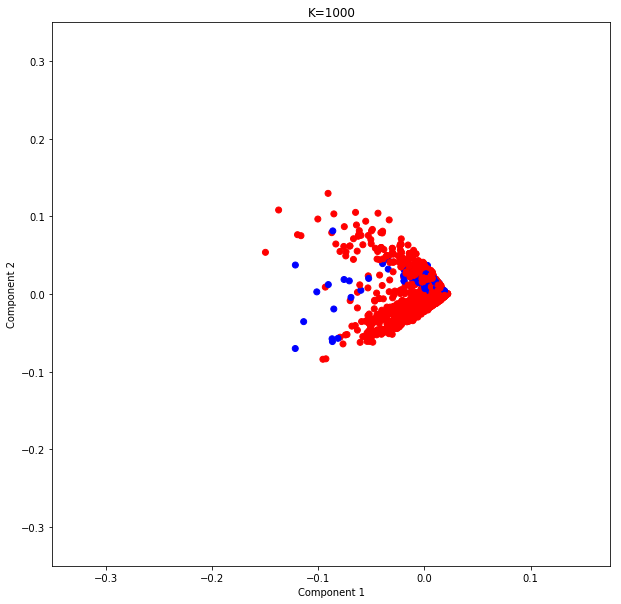

In [206]:
for i in [ 10, 20, 30, 40, 50, 60, 100, 200, 1000]:
    # prepare for plotting
    lle = locally_linear_embedding(train_X, n_components=2, n_neighbors=i, random_state=0)[0]
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(lle[:,0], lle[:,1], marker='o', c=colors)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.xlim(-0.35, 0.175)
    plt.ylim(-0.35, 0.35)
    plt.title(f'K={i}')
    plt.savefig(f'./{IMG_PATH}/LLE_reduce_quantlets{i}.png', transparent=True)